In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [2]:
train=pd.read_csv('train.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.shape

(891, 12)

In [46]:
train.columns
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Age          891 non-null    float64
 4   SibSp        891 non-null    int64  
 5   Parch        891 non-null    int64  
 6   Fare         891 non-null    float64
 7   male         891 non-null    int32  
 8   Q            891 non-null    int32  
 9   S            891 non-null    int32  
dtypes: float64(2), int32(3), int64(5)
memory usage: 59.3 KB


In [6]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<Axes: >

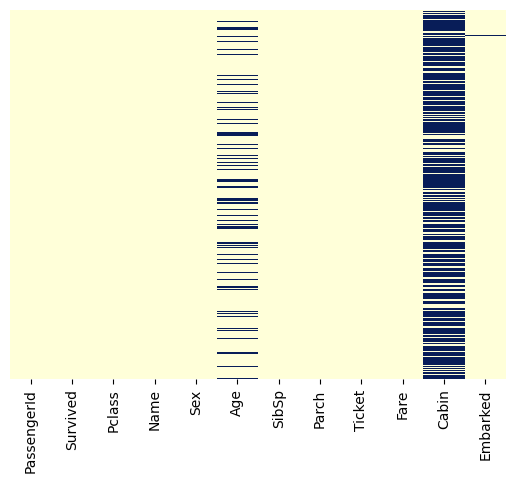

In [7]:
import matplotlib
#matplotlib.rcParams['figure.figsize']=(12,6)
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='YlGnBu')

<Axes: xlabel='Survived', ylabel='count'>

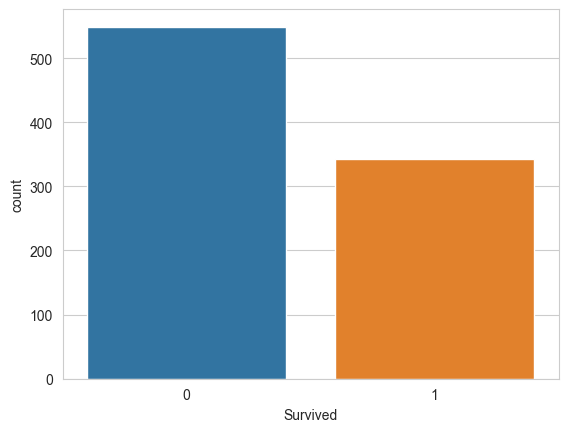

In [8]:
sns.set_style('whitegrid')
sns.countplot(data=train,x='Survived')

<Axes: xlabel='Survived', ylabel='count'>

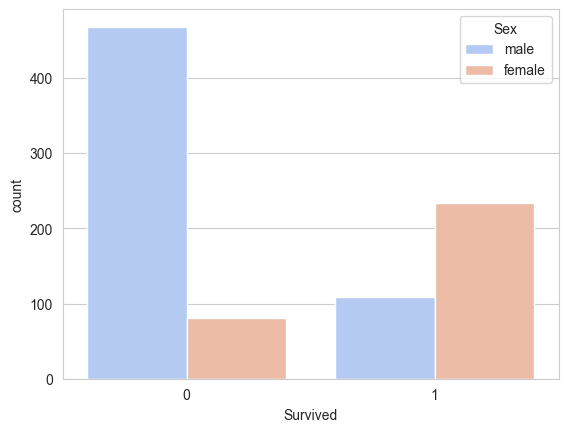

In [9]:
sns.countplot(data=train,x='Survived',hue='Sex',palette='coolwarm')

<Axes: xlabel='Survived', ylabel='count'>

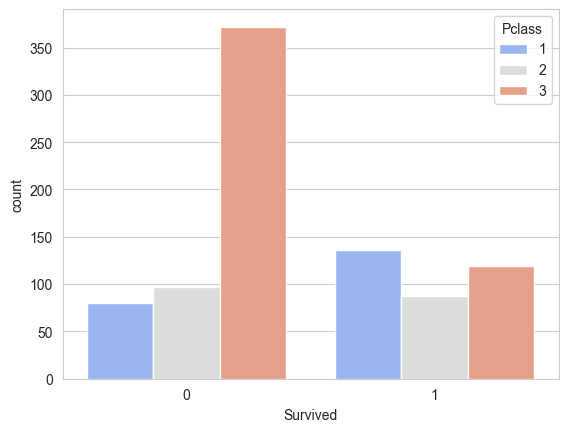

In [10]:
sns.countplot(data=train,x='Survived',hue='Pclass',palette='coolwarm')

C:\Users\shimu\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


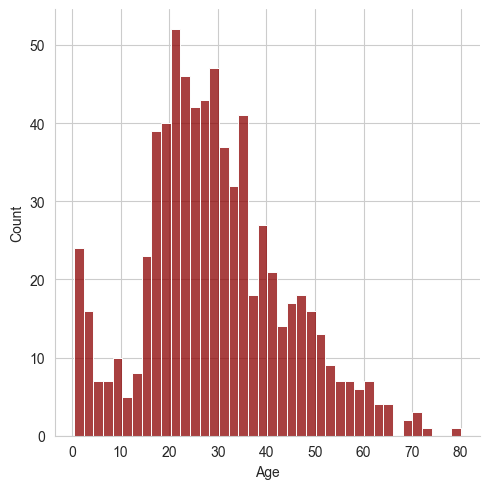

In [11]:
sns.displot(train['Age'].dropna(),kde=False,color='darkred',bins=40)

<Axes: xlabel='SibSp', ylabel='count'>

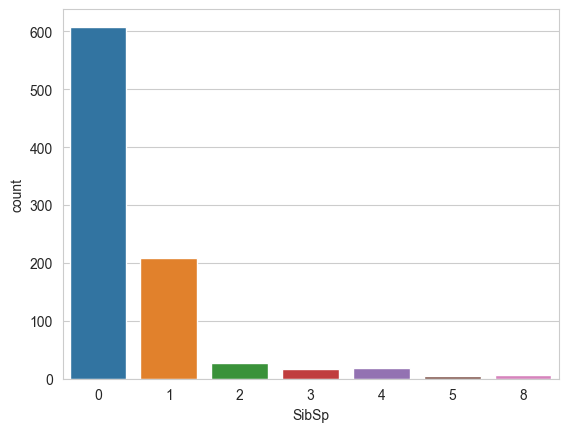

In [12]:
sns.countplot(data=train, x='SibSp')

In [13]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

<Axes: xlabel='Fare', ylabel='Count'>

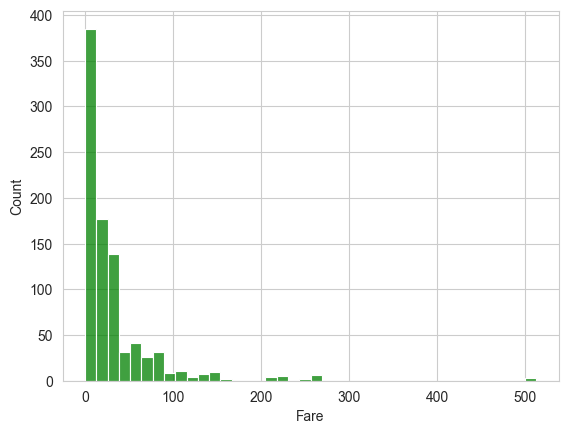

In [14]:
sns.histplot(data=train,x='Fare',bins=40,color='green')

<Axes: >

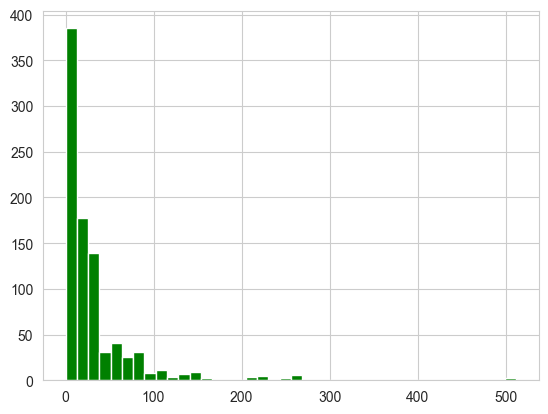

In [15]:
train['Fare'].hist(color='green',bins=40)

In [16]:
#Data Cleaning

<Axes: xlabel='Pclass', ylabel='Age'>

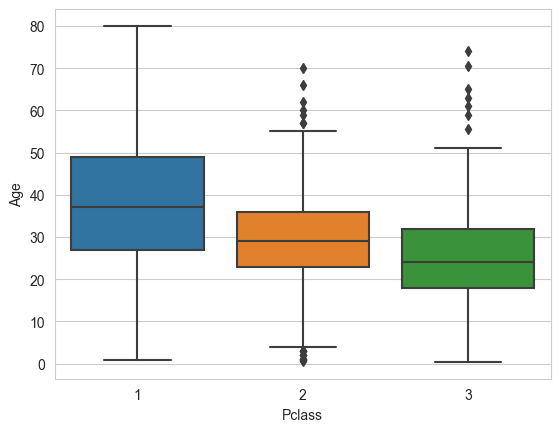

In [17]:
sns.boxplot(data=train,x='Pclass',y='Age')

In [18]:
def imput_age(cols):
    Age=cols[0]
    Pclass=cols[1]
    if pd.isnull(Age):
        if Pclass ==1:
            return 37
        elif Pclass ==2:
            return 29
        else:
            return 24
    else:
        return Age

In [19]:
#apply the function
train['Age']=train[['Age','Pclass']].apply(imput_age,axis=1)

In [20]:
train.drop('Cabin',axis=1,inplace=True)

<Axes: >

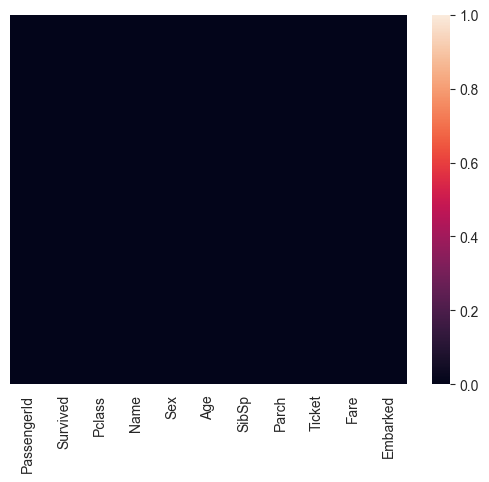

In [21]:
sns.heatmap(train.isnull(),yticklabels=False)

In [22]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [23]:
#covert categorical feature --> dummy variable using pandas

In [24]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [25]:
embark=pd.get_dummies(train['Embarked'],drop_first=True).astype(int)

In [26]:
sex=pd.get_dummies(train['Sex'],drop_first=True).astype(int)

In [27]:
sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [28]:
train.drop(['Name', 'Sex','Embarked', 'Ticket'],axis=1,inplace=True)

In [29]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [30]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [31]:
train=pd.concat([train,sex,embark],axis=1)

In [32]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [33]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Age          891 non-null    float64
 4   SibSp        891 non-null    int64  
 5   Parch        891 non-null    int64  
 6   Fare         891 non-null    float64
 7   male         891 non-null    int32  
 8   Q            891 non-null    int32  
 9   S            891 non-null    int32  
dtypes: float64(2), int32(3), int64(5)
memory usage: 59.3 KB


In [34]:
#train test split
train.drop('Survived',axis=1).astype(int).head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,3,22,1,0,7,1,0,1
1,2,1,38,1,0,71,0,0,0
2,3,3,26,0,0,7,0,0,1
3,4,1,35,1,0,53,0,0,1
4,5,3,35,0,0,8,1,0,1


In [35]:
train['Survived'].head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
X_train,X_test,y_train,y_test= train_test_split(train.drop('Survived',axis=1),
                                               train['Survived'],test_size=0.30,random_state=101)

In [38]:
#training and Predicting 
from sklearn.linear_model import LogisticRegression

In [39]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

C:\Users\shimu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [40]:
predictions = logmodel.predict(X_test)

In [41]:
from sklearn.metrics import confusion_matrix

In [42]:
accuracy= confusion_matrix(y_test,predictions)

In [43]:
accuracy

array([[132,  22],
       [ 42,  72]], dtype=int64)

In [44]:
from sklearn.metrics import accuracy_score

In [45]:
accuracy= accuracy_score(y_test,predictions)
accuracy

0.7611940298507462